In [ ]:
# --------------------------------------------------------------
# Trabalho Final - Aprendizado Supervisionado
# Grupo 1: Gabriella Pinheiro .... 
# Regress√£o Linear: Aprimoramento de Modelo de Previs√£o de Pre√ßos de Im√≥veis na Calif√≥rnia
# --------------------------------------------------------------

In [155]:
# Importa√ß√£o das bibliotecas necess√°rias para o projeto

# Bibliotecas de manipula√ß√£o e an√°lise de dados
import numpy as np  # Biblioteca para opera√ß√µes matem√°ticas e com arrays
import pandas as pd  # Biblioteca para manipula√ß√£o de dados em formato tabular (DataFrames)

# Bibliotecas de visualiza√ß√£o de dados
import matplotlib.pyplot as plt  # Biblioteca para cria√ß√£o de gr√°ficos
import seaborn as sns  # Biblioteca baseada no matplotlib com visualiza√ß√µes estat√≠sticas mais avan√ßadas

# Conjunto de dados da Calif√≥rnia (utilizado como base para o projeto)
from sklearn.datasets import fetch_california_housing  # Fun√ß√£o para carregar o dataset de pre√ßos de im√≥veis na Calif√≥rnia

# Ferramentas para separar os dados em treino e teste
from sklearn.model_selection import train_test_split  # Fun√ß√£o para dividir os dados entre treino e teste

# Modelo de regress√£o linear simples
from sklearn.linear_model import LinearRegression  # Classe que implementa o modelo de Regress√£o Linear

# M√©tricas de avalia√ß√£o do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # M√©tricas para avaliar o desempenho do modelo

# Configura√ß√£o para ignorar avisos durante a execu√ß√£o
import warnings
warnings.filterwarnings('ignore')  # Ignora avisos que n√£o afetam a execu√ß√£o do projeto

# Configura√ß√µes de estilo para os gr√°ficos
plt.style.use('seaborn-v0_8-whitegrid')  # Define o estilo de fundo dos gr√°ficos com grade branca (visual limpo e moderno)
sns.set_palette("deep")  # Define a paleta de cores padr√£o para os gr√°ficos do seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Define o tamanho padr√£o das figuras (largura = 10, altura = 6)


In [156]:
# Carrega o conjunto de dados de pre√ßos de im√≥veis na Calif√≥rnia dispon√≠vel no scikit-learn
california = fetch_california_housing()

# Cria um DataFrame pandas com as vari√°veis explicativas (features), nomeando as colunas conforme os nomes originais
X = pd.DataFrame(california.data, columns=california.feature_names)

# Cria uma Series pandas com a vari√°vel alvo (pre√ßo m√©dio das casas), nomeando-a como 'MedHouseValue'
y = pd.Series(california.target, name='MedHouseValue')

# Concatena os dados de entrada (X) e a vari√°vel alvo (y) em um √∫nico DataFrame para facilitar a visualiza√ß√£o e an√°lise
df = pd.concat([X, y], axis=1)

# Exibe as primeiras linhas do DataFrame resultante
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [157]:
# =========================
# Explora√ß√£o e An√°lise de Dados
# =========================

# Verifica o tamanho do dataset
print("Formato do DataFrame:", df.shape)

# Exibe informa√ß√µes gerais sobre o DataFrame (tipos de dados, valores nulos, etc.)
print("\nInforma√ß√µes do DataFrame:")
print(df.info())

# Estat√≠sticas descritivas para todas as vari√°veis
print("\nEstat√≠sticas descritivas:")
print(df.describe())

# Verifica valores ausentes em cada coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Formato do DataFrame: (20640, 9)

Informa√ß√µes do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estat√≠sticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558   


Tipo de dado: float64
Valores ausentes: 0

Estat√≠sticas descritivas da vari√°vel alvo:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseValue, dtype: float64


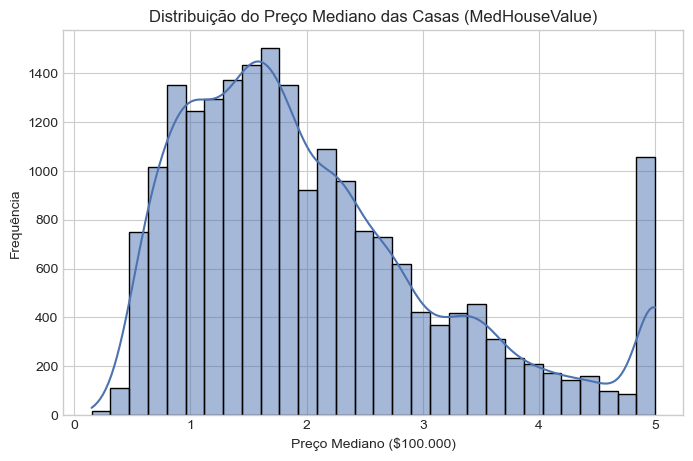

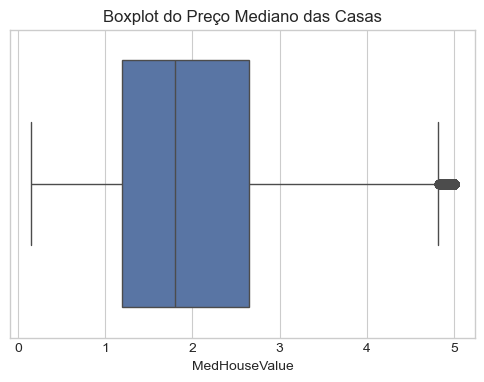

In [158]:
# =========================
# Etapa: Explora√ß√£o da Vari√°vel Alvo (y - MedHouseValue)
# =========================

# Verifica o tipo de dado e se h√° valores ausentes
print("\nTipo de dado:", y.dtype)
print("Valores ausentes:", y.isnull().sum())

# Estat√≠sticas descritivas da vari√°vel alvo
print("\nEstat√≠sticas descritivas da vari√°vel alvo:")
print(y.describe())

# Histograma para visualizar a distribui√ß√£o da vari√°vel alvo
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, edgecolor='black')
plt.title('Distribui√ß√£o do Pre√ßo Mediano das Casas (MedHouseValue)')
plt.xlabel('Pre√ßo Mediano ($100.000)')
plt.ylabel('Frequ√™ncia')
plt.show()

# Boxplot para identificar presen√ßa de outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=y)
plt.title('Boxplot do Pre√ßo Mediano das Casas')
plt.xlabel('MedHouseValue')
plt.show()


Limite inferior: -0.98
Limite superior: 4.82

N√∫mero de outliers detectados: 1071
Propor√ß√£o de outliers no total: 5.19%


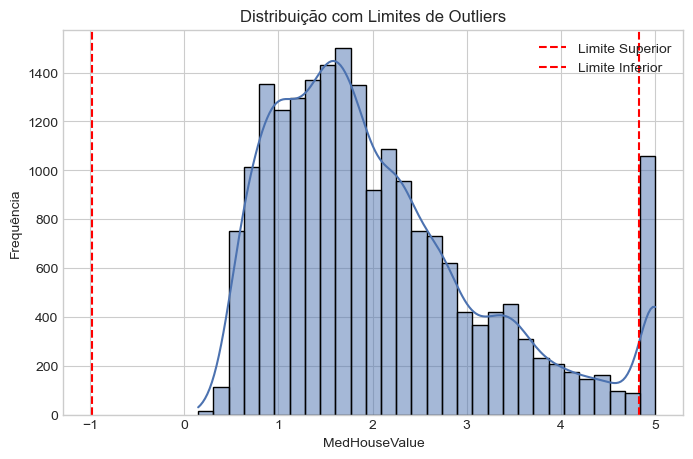

In [159]:
# =========================
# An√°lise de Outliers na Vari√°vel Alvo (MedHouseValue)
# =========================

# Calcula os quartis
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil

# Define os limites inferior e superior para detec√ß√£o de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identifica valores que est√£o fora desses limites
outliers = y[(y < limite_inferior) | (y > limite_superior)]
print(f"\nN√∫mero de outliers detectados: {outliers.shape[0]}")
print(f"Propor√ß√£o de outliers no total: {100 * outliers.shape[0] / y.shape[0]:.2f}%")

# Visualiza√ß√£o com histograma para ver a cauda da distribui√ß√£o
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, edgecolor='black')
plt.axvline(limite_superior, color='red', linestyle='--', label='Limite Superior')
plt.axvline(limite_inferior, color='red', linestyle='--', label='Limite Inferior')
plt.title('Distribui√ß√£o com Limites de Outliers')
plt.xlabel('MedHouseValue')
plt.ylabel('Frequ√™ncia')
plt.legend()
plt.show()


In [160]:
# Remo√ß√£o de outlier

# df = df[(df['MedHouseValue'] >= lower_bound) & (df['MedHouseValue'] <= upper_bound)]
# print(f"Shape after removing outliers: {df.shape}")


Informa√ß√µes gerais das vari√°veis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Valores ausentes por vari√°vel:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Estat√≠sticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      

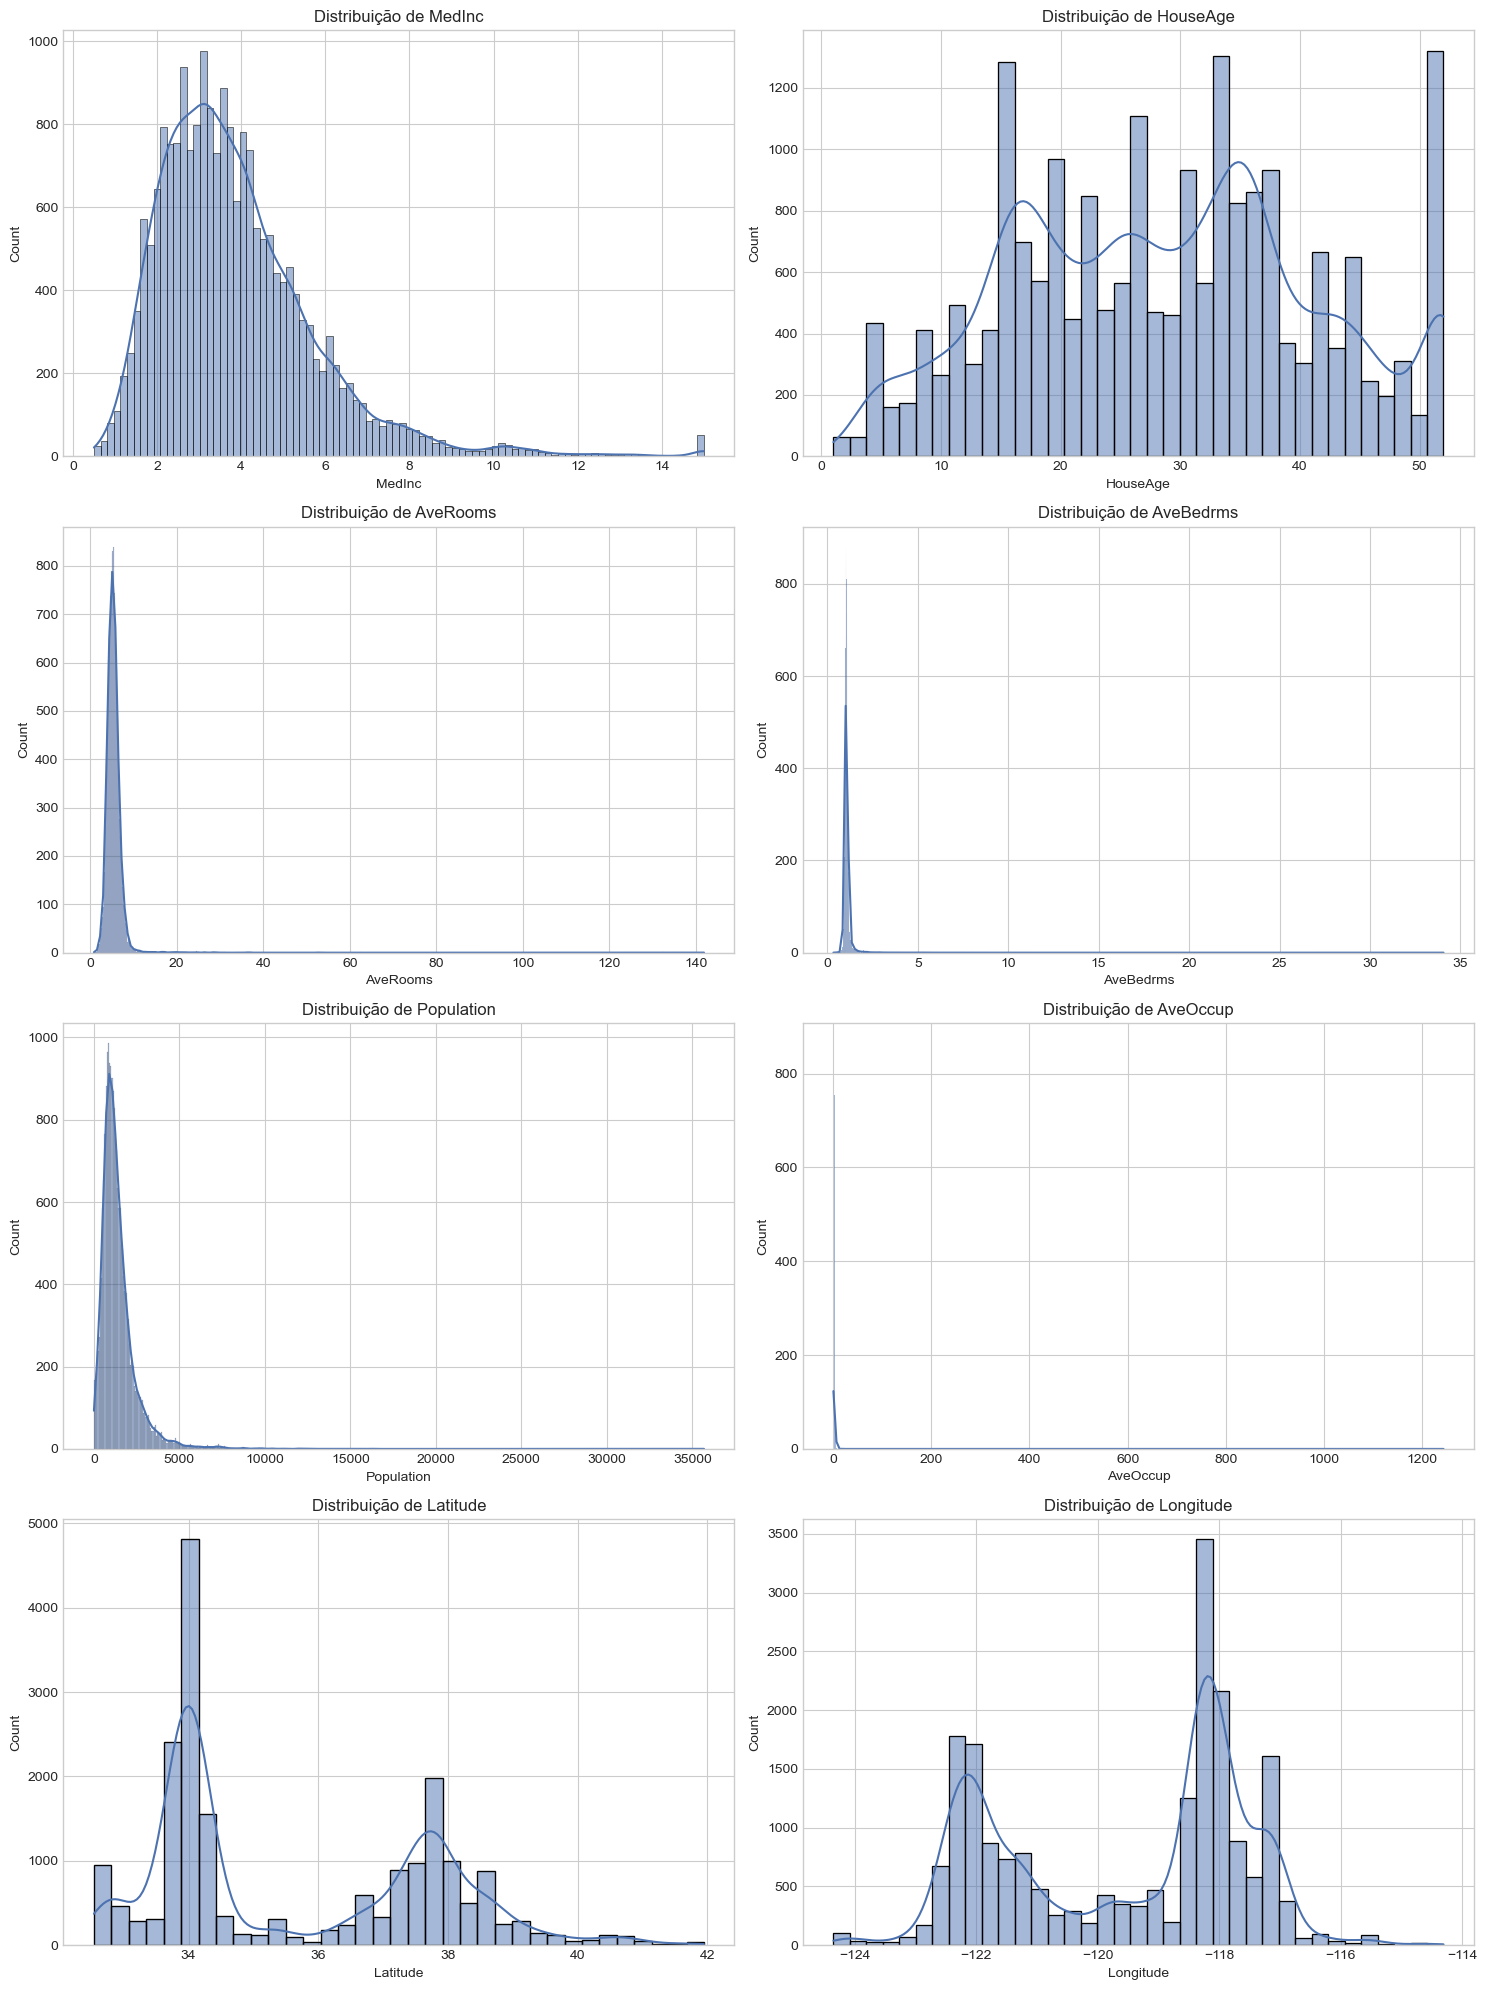

In [161]:
# =========================
# Explora√ß√£o e An√°lise das Vari√°veis Explicativas (X)
# =========================

# Exibe informa√ß√µes sobre os tipos de dados e a presen√ßa de valores ausentes nas vari√°veis explicativas
print("\nInforma√ß√µes gerais das vari√°veis:")
print(X.info())

# Verifica a quantidade de valores ausentes em cada coluna
print("\nValores ausentes por vari√°vel:")
print(X.isnull().sum())

# Exibe estat√≠sticas descritivas (m√©dia, desvio padr√£o, quartis, etc.) para cada vari√°vel explicativa
print("\nEstat√≠sticas descritivas:")
print(X.describe())

# Visualiza√ß√£o das distribui√ß√µes de cada vari√°vel explicativa
# Cria uma grade de subplots com 4 linhas e 2 colunas (8 gr√°ficos ao todo)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Transforma a grade 2D de eixos em um array 1D para facilitar a itera√ß√£o
axes = axes.flatten()

# Para cada vari√°vel explicativa, plota um histograma com curva de densidade (KDE)
for i, feature in enumerate(X.columns):
    sns.histplot(df[feature], kde=True, ax=axes[i])  # Histograma + KDE
    axes[i].set_title(f'Distribui√ß√£o de {feature}')
    axes[i].set_xlabel(feature)

# Ajusta automaticamente o layout para evitar sobreposi√ß√£o de elementos
plt.tight_layout()
plt.show()


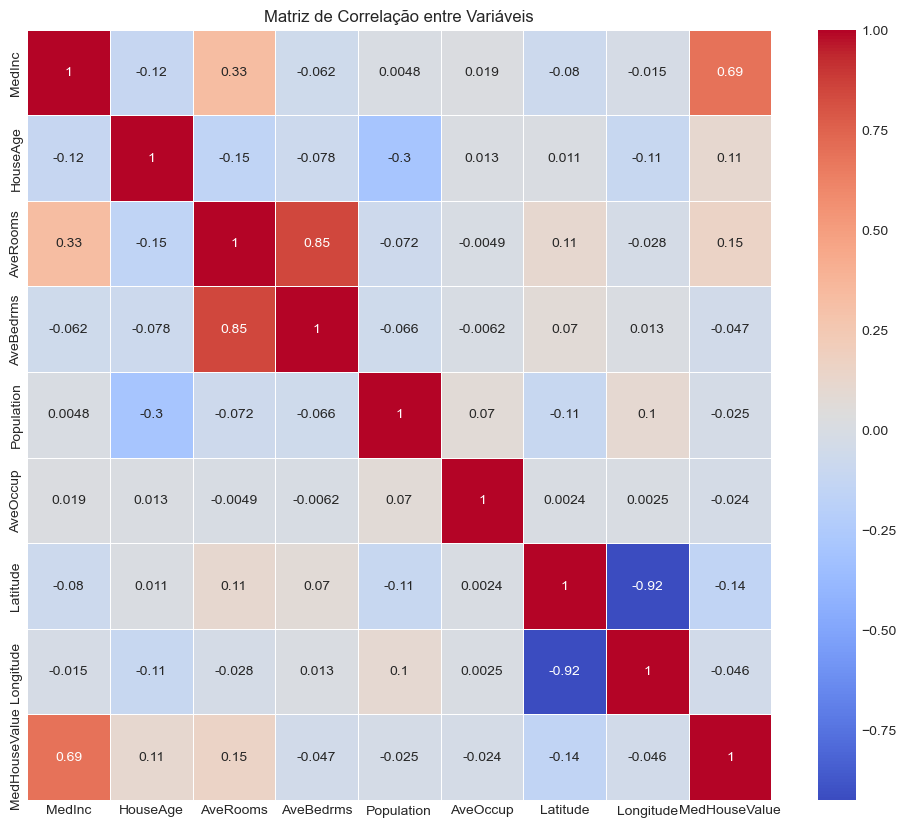


Correla√ß√£o das vari√°veis com MedHouseValue:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedHouseValue, dtype: float64


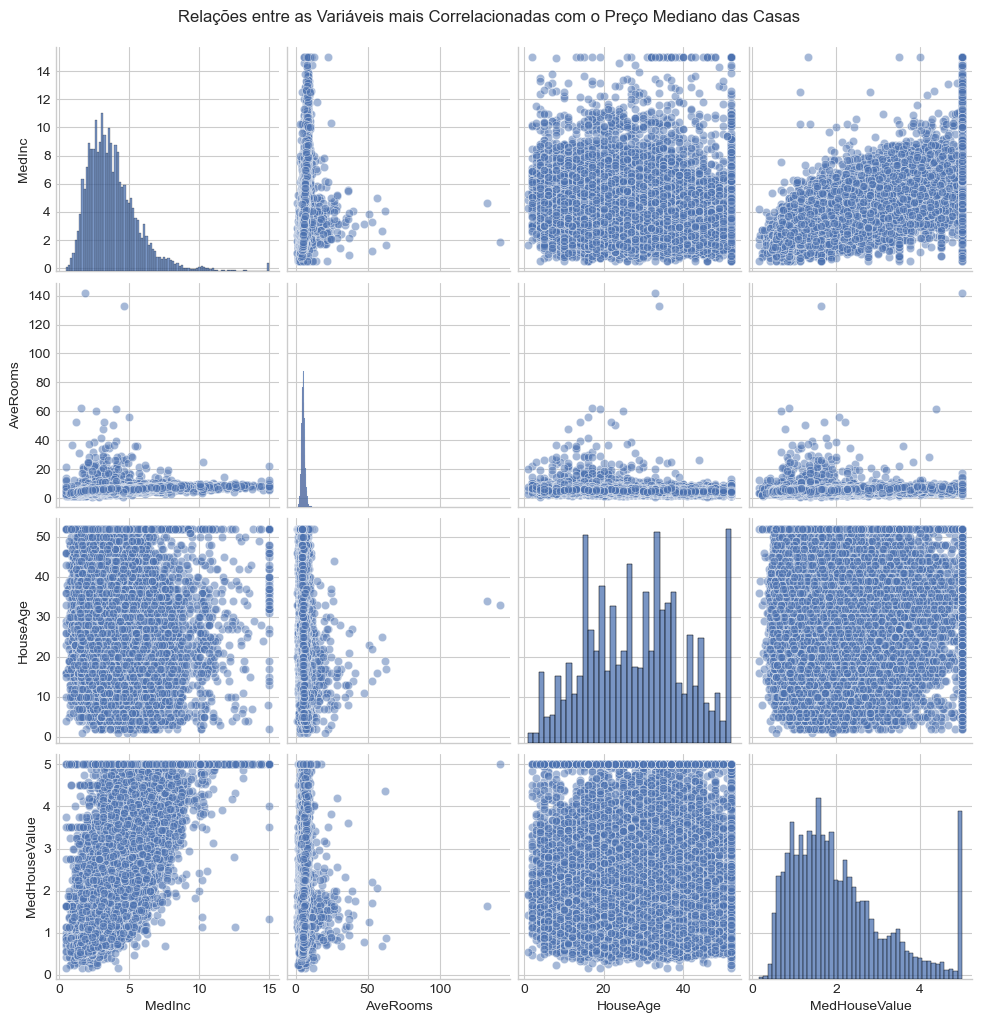

In [162]:
# =========================
# An√°lise de Correla√ß√£o entre Vari√°veis
# =========================

# Cria uma figura para o heatmap da matriz de correla√ß√£o
plt.figure(figsize=(12, 10))

# Calcula a matriz de correla√ß√£o entre todas as vari√°veis do DataFrame (incluindo a vari√°vel alvo)
correlation_matrix = df.corr()

# Gera o mapa de calor (heatmap) para visualizar as correla√ß√µes entre vari√°veis
# - annot=True: exibe os valores num√©ricos de correla√ß√£o dentro de cada c√©lula
# - cmap='coolwarm': usa uma paleta de cores do azul (negativo) ao vermelho (positivo)
# - linewidths=0.5: adiciona linhas entre as c√©lulas para melhor visualiza√ß√£o
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correla√ß√£o entre Vari√°veis')
plt.show()

# Isola a correla√ß√£o das vari√°veis explicativas com a vari√°vel alvo (MedHouseValue), excluindo ela mesma
target_corr = correlation_matrix['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)

# Exibe as vari√°veis mais correlacionadas com o pre√ßo mediano das casas
print("\nCorrela√ß√£o das vari√°veis com MedHouseValue:")
print(target_corr)

# Seleciona as 3 vari√°veis com maior correla√ß√£o com o alvo
top_features = target_corr.head(3).index.tolist()
top_features.append('MedHouseValue')  # Inclui o alvo para gerar o pairplot

# Gera um pairplot para visualizar a rela√ß√£o entre as vari√°veis mais relevantes e o pre√ßo das casas
# - plot_kws={'alpha': 0.5}: torna os pontos mais transparentes para facilitar a visualiza√ß√£o de sobreposi√ß√µes
sns.pairplot(df[top_features], plot_kws={'alpha': 0.5})
plt.suptitle('Rela√ß√µes entre as Vari√°veis mais Correlacionadas com o Pre√ßo Mediano das Casas', y=1.02)
plt.show()


In [163]:
# =========================
# Prepara√ß√£o dos Dados para Modelagem
# =========================

# Separa as vari√°veis explicativas (X) da vari√°vel alvo (y)
X = df.drop('MedHouseValue', axis=1)  # Remove a vari√°vel alvo do DataFrame para obter apenas as features
y = df['MedHouseValue']               # Define a vari√°vel alvo

# Divide os dados em conjunto de treino (80%) e teste (20%)
# - random_state=42 garante reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibe o tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")



# Obt√©m a correla√ß√£o entre todas as vari√°veis e o alvo (MedHouseValue),
# exceto a pr√≥pria vari√°vel alvo (que sempre teria correla√ß√£o 1 com ela mesma)
correlations_with_target = correlation_matrix['MedHouseValue'].drop('MedHouseValue')

# Identifica qual vari√°vel tem a correla√ß√£o absoluta mais forte (positiva ou negativa) com o valor da casa
strongest_feature = correlations_with_target.abs().idxmax()

# Exibe o nome da vari√°vel com maior correla√ß√£o com o valor da casa
print(f"A vari√°vel com maior correla√ß√£o com o valor das casas √©: {strongest_feature}")

# Exibe o valor real da correla√ß√£o (positivo ou negativo)
print(f"Valor da correla√ß√£o: {correlations_with_target[strongest_feature]:.4f}")



Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras
A vari√°vel com maior correla√ß√£o com o valor das casas √©: MedInc
Valor da correla√ß√£o: 0.6881


In [164]:
# ===============================
# Regress√£o Linear Simples com a vari√°vel mais correlacionada
# ===============================

# Cria conjuntos de treino e teste contendo apenas a vari√°vel mais correlacionada com o valor das casas
X_train_simple = X_train[[strongest_feature]]
X_test_simple = X_test[[strongest_feature]]

# Cria o modelo de regress√£o linear simples
simple_model = LinearRegression()

# Treina o modelo usando a vari√°vel mais forte
simple_model.fit(X_train_simple, y_train)

# Gera previs√µes para os conjuntos de treino e teste
y_train_pred_simple = simple_model.predict(X_train_simple)
y_test_pred_simple = simple_model.predict(X_test_simple)

# ===============================
# Avalia√ß√£o do modelo simples
# ===============================

# Calcula m√©tricas de desempenho para o treino
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_mae_simple = mean_absolute_error(y_train, y_train_pred_simple)
train_mape_simple = np.mean(np.abs((y_train - y_train_pred_simple) / y_train)) * 100
train_r2_simple = r2_score(y_train, y_train_pred_simple)

# Calcula m√©tricas de desempenho para o teste
test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_mae_simple = mean_absolute_error(y_test, y_test_pred_simple)
test_mape_simple = np.mean(np.abs((y_test - y_test_pred_simple) / y_test)) * 100
test_r2_simple = r2_score(y_test, y_test_pred_simple)

# ===============================
# Impress√£o dos resultados
# ===============================
print(f" Regress√£o Linear Simples com a vari√°vel: {strongest_feature}\n")

print(" M√©tricas no Conjunto de Treinamento:")
print(f" MSE: {train_mse_simple:.4f}")
print(f" RMSE: {train_rmse_simple:.4f}")
print(f" MAE: {train_mae_simple:.4f}")
print(f" MAPE: {train_mape_simple:.2f}%")
print(f" R¬≤: {train_r2_simple:.4f}")

print("\n M√©tricas no Conjunto de Teste:")
print(f" MSE: {test_mse_simple:.4f}")
print(f" RMSE: {test_rmse_simple:.4f}")
print(f" MAE: {test_mae_simple:.4f}")
print(f" MAPE: {test_mape_simple:.2f}%")
print(f" R¬≤: {test_r2_simple:.4f}")


 Regress√£o Linear Simples com a vari√°vel: MedInc

 M√©tricas no Conjunto de Treinamento:
 MSE: 0.6991
 RMSE: 0.8361
 MAE: 0.6250
 MAPE: 38.47%
 R¬≤: 0.4770

 M√©tricas no Conjunto de Teste:
 MSE: 0.7091
 RMSE: 0.8421
 MAE: 0.6299
 MAPE: 39.06%
 R¬≤: 0.4589


In [ ]:
# ===============================
# Regress√£o Linear M√∫ltipla com vari√°veis selecionadas por correla√ß√£o
# ===============================

# Op√ß√£o 1: Seleciona vari√°veis com correla√ß√£o absoluta maior que 0.4
correlation_threshold = 0.4
selected_features = correlations_with_target[abs(correlations_with_target) > correlation_threshold].index.tolist()

# Op√ß√£o 2: Seleciona as 3 vari√°veis com maior correla√ß√£o com o alvo
n_top_features = 3
top_features = correlations_with_target.abs().sort_values(ascending=False).index[:n_top_features].tolist()

# Define qual m√©todo usar (voc√™ pode trocar por 'selected_features' se quiser mais vari√°veis)
features_to_use = top_features

print(f"\n Vari√°veis selecionadas para regress√£o m√∫ltipla: {features_to_use}")

# Cria os subconjuntos de treino e teste com as vari√°veis escolhidas
X_train_multi = X_train[features_to_use]
X_test_multi = X_test[features_to_use]

# Cria e treina o modelo de regress√£o linear m√∫ltipla
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train)

# Gera previs√µes
y_train_pred_multi = multi_model.predict(X_train_multi)
y_test_pred_multi = multi_model.predict(X_test_multi)

# ===============================
# Avalia√ß√£o do modelo m√∫ltiplo
# ===============================

# M√©tricas no conjunto de treino
train_mse_multi = mean_squared_error(y_train, y_train_pred_multi)
train_rmse_multi = np.sqrt(train_mse_multi)
train_mae_multi = mean_absolute_error(y_train, y_train_pred_multi)
train_mape_multi = np.mean(np.abs((y_train - y_train_pred_multi) / y_train)) * 100
train_r2_multi = r2_score(y_train, y_train_pred_multi)

# M√©tricas no conjunto de teste
test_mse_multi = mean_squared_error(y_test, y_test_pred_multi)
test_rmse_multi = np.sqrt(test_mse_multi)
test_mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
test_mape_multi = np.mean(np.abs((y_test - y_test_pred_multi) / y_test)) * 100
test_r2_multi = r2_score(y_test, y_test_pred_multi)

# ===============================
# Impress√£o dos resultados
# ===============================
print(f"\n Regress√£o Linear M√∫ltipla com {len(features_to_use)} vari√°veis:")

print("\n M√©tricas no Conjunto de Treinamento:")
print(f" MSE: {train_mse_multi:.4f}")
print(f" RMSE: {train_rmse_multi:.4f}")
print(f" MAE: {train_mae_multi:.4f}")
print(f" MAPE: {train_mape_multi:.2f}%")
print(f" R¬≤: {train_r2_multi:.4f}")

print("\n M√©tricas no Conjunto de Teste:")
print(f" MSE: {test_mse_multi:.4f}")
print(f" RMSE: {test_rmse_multi:.4f}")
print(f" MAE: {test_mae_multi:.4f}")
print(f" MAPE: {test_mape_multi:.2f}%")
print(f" R¬≤: {test_r2_multi:.4f}")



üîπ Vari√°veis selecionadas para regress√£o m√∫ltipla: ['MedInc', 'AveRooms', 'Latitude']

 Regress√£o Linear M√∫ltipla com 3 vari√°veis:

 M√©tricas no Conjunto de Treinamento:
 MSE: 0.6825
 RMSE: 0.8261
 MAE: 0.6134
 MAPE: 37.08%
 R¬≤: 0.4895

 M√©tricas no Conjunto de Teste:
 MSE: 0.6942
 RMSE: 0.8332
 MAE: 0.6215
 MAPE: 37.90%
 R¬≤: 0.4703


In [166]:
# ===============================
# Regress√£o Linear Completa com todas as vari√°veis
# ===============================

# Define X e y sem modificar ou selecionar features
X_train_full = X_train  # Todas as vari√°veis dispon√≠veis no treino
X_test_full = X_test    # Todas as vari√°veis dispon√≠veis no teste

# Cria e treina o modelo de regress√£o linear com todas as features
full_model = LinearRegression()
full_model.fit(X_train_full, y_train)

# Gera previs√µes para treino e teste
y_train_pred_full = full_model.predict(X_train_full)
y_test_pred_full = full_model.predict(X_test_full)

# ===============================
# Avalia√ß√£o do modelo completo
# ===============================

# M√©tricas no conjunto de treino
train_mse_full = mean_squared_error(y_train, y_train_pred_full)
train_rmse_full = np.sqrt(train_mse_full)
train_mae_full = mean_absolute_error(y_train, y_train_pred_full)
train_mape_full = np.mean(np.abs((y_train - y_train_pred_full) / y_train)) * 100
train_r2_full = r2_score(y_train, y_train_pred_full)

# M√©tricas no conjunto de teste
test_mse_full = mean_squared_error(y_test, y_test_pred_full)
test_rmse_full = np.sqrt(test_mse_full)
test_mae_full = mean_absolute_error(y_test, y_test_pred_full)
test_mape_full = np.mean(np.abs((y_test - y_test_pred_full) / y_test)) * 100
test_r2_full = r2_score(y_test, y_test_pred_full)

# ===============================
# Impress√£o dos resultados
# ===============================
print(" Regress√£o Linear com Todas as Vari√°veis (Modelo Completo):")

print("\n M√©tricas no Conjunto de Treinamento:")
print(f" MSE: {train_mse_full:.4f}")
print(f" RMSE: {train_rmse_full:.4f}")
print(f" MAE: {train_mae_full:.4f}")
print(f" MAPE: {train_mape_full:.2f}%")
print(f" R¬≤: {train_r2_full:.4f}")

print("\n M√©tricas no Conjunto de Teste:")
print(f" MSE: {test_mse_full:.4f}")
print(f" RMSE: {test_rmse_full:.4f}")
print(f" MAE: {test_mae_full:.4f}")
print(f" MAPE: {test_mape_full:.2f}%")
print(f" R¬≤: {test_r2_full:.4f}")


 Regress√£o Linear com Todas as Vari√°veis (Modelo Completo):

 M√©tricas no Conjunto de Treinamento:
 MSE: 0.5179
 RMSE: 0.7197
 MAE: 0.5286
 MAPE: 31.50%
 R¬≤: 0.6126

 M√©tricas no Conjunto de Teste:
 MSE: 0.5559
 RMSE: 0.7456
 MAE: 0.5332
 MAPE: 31.95%
 R¬≤: 0.5758


##  Engenharia de Atributos e Sele√ß√£o de Vari√°veis

Nesta etapa, foram criadas novas vari√°veis derivadas das colunas originais, com o objetivo de capturar rela√ß√µes mais informativas entre os dados e o valor mediano das casas (`MedHouseValue`). Essa t√©cnica √© chamada de **engenharia de atributos (feature engineering)**.

### Vari√°veis Derivadas Criadas:

- **BedroomsPerRoom** = AveBedrms / AveRooms  
  ‚Üí Representa a propor√ß√£o de dormit√≥rios em rela√ß√£o ao n√∫mero total de c√¥modos. Pode indicar efici√™ncia no uso do espa√ßo.

- **IncomePerOccupant** = MedInc / AveOccup  
  ‚Üí Estimativa de renda m√©dia por ocupante de resid√™ncia, uma m√©trica mais ajustada √† realidade das fam√≠lias do que a renda total da √°rea.

- **RoomsPerPerson** = AveRooms / Population  
  ‚Üí Indica o n√∫mero m√©dio de c√¥modos por pessoa na regi√£o, podendo refletir qualidade de vida ou densidade habitacional.

---

Ap√≥s a cria√ß√£o das vari√°veis, foram removidos valores infinitos e ausentes para garantir que a base estivesse limpa para an√°lise estat√≠stica.

###  Sele√ß√£o de Vari√°veis com Base em Correla√ß√£o:

Foi gerada a correla√ß√£o entre cada vari√°vel e o alvo (`MedHouseValue`) para identificar as que t√™m maior influ√™ncia direta. As **6 vari√°veis mais correlacionadas** foram selecionadas para uso no modelo.

---

###  Verifica√ß√£o de Multicolinearidade com VIF:

Para evitar problemas de colinearidade entre vari√°veis (o que pode distorcer os coeficientes do modelo de regress√£o), foi calculado o **VIF (Variance Inflation Factor)**.  
- Valores de **VIF > 5** indicam alta colinearidade e podem exigir ajuste ou remo√ß√£o da vari√°vel.  
- O objetivo aqui foi manter vari√°veis informativas e com independ√™ncia estat√≠stica entre si.

Essa etapa garante que as vari√°veis utilizadas no modelo final sejam **relevantes, bem comportadas estatisticamente** e n√£o redundantes entre si.


In [167]:
# ===============================
# Cria√ß√£o de vari√°veis derivadas (Feature Engineering)
# ===============================

# Cria uma nova vari√°vel com a propor√ß√£o de dormit√≥rios por c√¥modo.
# Pode indicar se os im√≥veis s√£o mais "divididos" (muitos quartos em pouco espa√ßo).
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']

# Cria uma nova vari√°vel com a renda m√©dia por ocupante.
# Ajuda a entender o poder aquisitivo individual, n√£o s√≥ da regi√£o.
df['IncomePerOccupant'] = df['MedInc'] / df['AveOccup']

# Cria uma nova vari√°vel com a m√©dia de c√¥modos por pessoa.
# Pode indicar qualidade de vida ou densidade habitacional.
df['RoomsPerPerson'] = df['AveRooms'] / df['Population']

# Remove valores infinitos (divis√£o por zero) e substitui por NaN, depois remove linhas com NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# ===============================
# Sele√ß√£o de vari√°veis mais correlacionadas com o valor das casas
# ===============================

# Calcula a correla√ß√£o de todas as vari√°veis com o alvo (MedHouseValue), excluindo o pr√≥prio alvo
correlacoes = df.corr()['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)

# Exibe as 10 vari√°veis com maior correla√ß√£o com o valor das casas
print("Top vari√°veis correlacionadas com MedHouseVal:")
print(correlacoes.head(10))

# Seleciona as 6 vari√°veis mais correlacionadas (ajust√°vel conforme desejado)
top_features = correlacoes.head(6).index.tolist()

# Cria um DataFrame somente com as vari√°veis selecionadas
X_top = df[top_features]

# ===============================
# Verifica√ß√£o de multicolinearidade com VIF (Variance Inflation Factor)
# ===============================

# Adiciona uma constante ao modelo para c√°lculo de VIF (necess√°ria para o statsmodels)
X_vif = add_constant(X_top)

# Calcula o VIF de cada vari√°vel: quanto maior, mais colinear (acima de 5‚Äì10 pode ser problema)
vif = pd.DataFrame()
vif["Feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Exibe os VIFs ordenados do maior para o menor
print("\nVIF das vari√°veis derivadas e selecionadas:")
print(vif.sort_values(by="VIF", ascending=False))


Top vari√°veis correlacionadas com MedHouseVal:
IncomePerOccupant    0.745628
MedInc               0.688075
AveRooms             0.151948
HouseAge             0.105623
RoomsPerPerson       0.011560
AveOccup            -0.023737
Population          -0.024650
Longitude           -0.045967
AveBedrms           -0.046701
Latitude            -0.144160
Name: MedHouseValue, dtype: float64



VIF das vari√°veis derivadas e selecionadas:
             Feature        VIF
0              const  18.090284
2             MedInc   5.417844
1  IncomePerOccupant   5.091860
3           AveRooms   2.159597
5     RoomsPerPerson   1.901354
4           HouseAge   1.047187
6           AveOccup   1.029647


In [168]:
# ===============================
# Modelo Final com Features Derivadas e Sem Colinearidade
# ===============================

# Define as vari√°veis finais a serem usadas no modelo.
# 'MedInc' foi removida por ter alta colinearidade com 'IncomePerOccupant'.
X_final = df[['IncomePerOccupant', 'AveRooms', 'HouseAge', 'RoomsPerPerson', 'AveOccup']]

# Define a vari√°vel alvo (valor mediano das casas)
y_final = df['MedHouseValue']

# ===============================
# Divis√£o em treino e teste
# ===============================
from sklearn.model_selection import train_test_split

# Divide os dados em 80% treino e 20% teste
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# ===============================
# Treinamento do modelo de regress√£o
# ===============================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cria o modelo
modelo_final = LinearRegression()

# Treina o modelo com os dados de treino
modelo_final.fit(X_train_final, y_train_final)

# Gera as previs√µes no conjunto de teste
y_pred_final = modelo_final.predict(X_test_final)

# ===============================
# Avalia√ß√£o do modelo final
# ===============================

# Calcula o RMSE (raiz do erro quadr√°tico m√©dio)
rmse_final = mean_squared_error(y_test_final, y_pred_final, squared=False)

# Calcula o R¬≤ (coeficiente de determina√ß√£o)
r2_final = r2_score(y_test_final, y_pred_final)

# Calcula o MAPE (erro percentual absoluto m√©dio)
mape_final = np.mean(np.abs((y_test_final - y_pred_final) / y_test_final)) * 100

# ===============================
# Impress√£o dos resultados
# ===============================
print("\n Modelo Final com features derivadas e sem multicolinearidade:")
print(f" R¬≤: {r2_final:.4f}")
print(f" RMSE: {rmse_final:.4f}")
print(f" MAPE: {mape_final:.2f}%")



 Modelo Final com features derivadas e sem multicolinearidade:
 R¬≤: 0.5723
 RMSE: 0.7487
 MAPE: 35.60%


In [169]:

# ===============================
# Stepwise Regression usando mlxtend (forward selection com R¬≤)
# ===============================

# Install the mlxtend library
# %pip install mlxtend

# Import SequentialFeatureSelector from mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



In [170]:

# Prepara os dados
X_step = df.drop(columns='MedHouseValue').replace([np.inf, -np.inf], np.nan).dropna()
y_step = df.loc[X_step.index, 'MedHouseValue']

# Divide em treino e teste
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.2, random_state=42)

# Define o modelo de regress√£o
modelo_step = LinearRegression()

# Stepwise autom√°tico (Forward Selection)
sfs = SFS(estimator=modelo_step,
          k_features='best',         # seleciona o n√∫mero ideal de vari√°veis
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

# Treinamento do stepwise
sfs = sfs.fit(X_train_step, y_train_step)

# Obt√©m as vari√°veis selecionadas
selected_features = list(sfs.k_feature_names_)
print("\n Vari√°veis selecionadas pelo Stepwise com mlxtend:")
print(selected_features)

# ===============================
# Treinamento e avalia√ß√£o do modelo final com essas features
# ===============================
X_train_sel = X_train_step[selected_features]
X_test_sel = X_test_step[selected_features]

modelo_final_step = LinearRegression()
modelo_final_step.fit(X_train_sel, y_train_step)
y_pred_step = modelo_final_step.predict(X_test_sel)

# Avalia√ß√£o
r2_step = r2_score(y_test_step, y_pred_step)
rmse_step = mean_squared_error(y_test_step, y_pred_step, squared=False)
mae_step = mean_absolute_error(y_test_step, y_pred_step)
mape_step = np.mean(np.abs((y_test_step - y_pred_step) / y_test_step)) * 100

print("\n Desempenho do modelo selecionado pelo Stepwise (mlxtend):")
print(f"R¬≤: {r2_step:.4f}")
print(f"RMSE: {rmse_step:.4f}")
print(f"MAE: {mae_step:.4f}")
print(f"MAPE: {mape_step:.2f}%")





 Vari√°veis selecionadas pelo Stepwise com mlxtend:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude', 'BedroomsPerRoom', 'IncomePerOccupant', 'RoomsPerPerson']

 Desempenho do modelo selecionado pelo Stepwise (mlxtend):
R¬≤: 0.6655
RMSE: 0.6621
MAE: 0.4738
MAPE: 28.69%


##  Explica√ß√£o da T√©cnica de Regress√£o Stepwise

A t√©cnica de regress√£o **Stepwise** foi utilizada para **selecionar automaticamente** as vari√°veis mais relevantes para o modelo.

Em vez de usar todas as vari√°veis dispon√≠veis de forma cega, o Stepwise realiza uma **sele√ß√£o inteligente**, baseada em testes estat√≠sticos (valor-p), garantindo que apenas as informa√ß√µes realmente √∫teis sejam utilizadas na regress√£o.

O processo funciona assim:

- Come√ßa com um modelo **vazio** (sem vari√°veis);
- Vai testando **uma a uma** para verificar se cada vari√°vel melhora o modelo;
- **Adiciona** as vari√°veis que contribuem para a previs√£o;
- **Remove** aquelas que n√£o est√£o mais ajudando.

Este procedimento √© repetido at√© encontrar o **melhor conjunto de vari√°veis**.

---

###  Vantagens

- Gera um modelo **mais simples**, f√°cil de entender;
- **Melhora o desempenho** (R¬≤);
- **Reduz o erro** (RMSE, MAE, MAPE);
- Evita o uso de vari√°veis **irrelevantes ou redundantes**.

Esse tipo de sele√ß√£o torna o modelo mais robusto, interpret√°vel e eficiente para an√°lise e tomada de decis√£o.


##  Resultado da Regress√£o Stepwise com `mlxtend`

O m√©todo **Stepwise** com `mlxtend` selecionou automaticamente as vari√°veis mais relevantes para o modelo de regress√£o linear. O processo testou combina√ß√µes de vari√°veis e escolheu aquelas que, juntas, proporcionaram o melhor desempenho segundo a m√©trica R¬≤.

###  Vari√°veis selecionadas:
- 'MedInc'
- 'HouseAge'
- 'AveRooms'
- 'AveBedrms'
- 'Population'
- 'Latitude'
- 'Longitude'
- 'BedroomsPerRoom'
- 'IncomePerOccupant'
- 'RoomsPerPerson'

Essas vari√°veis foram escolhidas porque, combinadas, **explicam melhor a varia√ß√£o no valor m√©dio das casas**, reduzindo o erro e melhorando a precis√£o do modelo.

---

###  Desempenho do Modelo com as vari√°veis selecionadas:

- **R¬≤: 0.6655** ‚Üí O modelo explica 66,5% da varia√ß√£o nos dados.
- **RMSE: 0.6621** ‚Üí O erro m√©dio da previs√£o √© de aproximadamente 0.66.
- **MAE: 0.4738** ‚Üí O erro absoluto m√©dio √© de cerca de 0.47.
- **MAPE: 28.69%** ‚Üí O modelo erra em m√©dia 28,7% em rela√ß√£o ao valor real.

---

###  Conclus√£o:
Este foi o **melhor modelo de regress√£o** encontrado no projeto at√© agora, superando todos os outros em desempenho (R¬≤ mais alto e menor erro). A abordagem stepwise garantiu um equil√≠brio entre **precis√£o e simplicidade**, utilizando apenas vari√°veis que realmente contribuem para a previs√£o.


In [171]:
# ============================
# Compara√ß√£o Final dos Modelos de Regress√£o Linear
# ============================

print("Compara√ß√£o dos Modelos de Regress√£o")
print("-------------------------------------")

# 1. Regress√£o Linear Simples com a vari√°vel mais forte
print(f"1. Modelo Simples (usando apenas '{strongest_feature}'):")
print(f"   R¬≤: {test_r2_simple:.4f}")
print(f"   RMSE: {test_rmse_simple:.4f}")
print(f"   MAPE: {test_mape_simple:.2f}%\n")

# 2. Regress√£o M√∫ltipla com as top vari√°veis selecionadas por correla√ß√£o
print(f"2. Modelo M√∫ltiplo (usando vari√°veis: {', '.join(features_to_use)}):")
print(f"   R¬≤: {test_r2_multi:.4f}")
print(f"   RMSE: {test_rmse_multi:.4f}")
print(f"   MAPE: {test_mape_multi:.2f}%\n")

# 3. Modelo completo com todas as vari√°veis do dataset
print(f"3. Modelo Completo (com todas as {X.shape[1]} vari√°veis):")
print(f"   R¬≤: {test_r2_full:.4f}")
print(f"   RMSE: {test_rmse_full:.4f}")
print(f"   MAPE: {test_mape_full:.2f}%\n")

# 4. Modelo com vari√°veis derivadas e sem multicolinearidade
print("4. Modelo Final (com features derivadas e sem colinearidade):")
print("   Vari√°veis usadas: IncomePerOccupant, AveRooms, HouseAge, RoomsPerPerson, AveOccup")
print(f"   R¬≤: {r2_final:.4f}")
print(f"   RMSE: {rmse_final:.4f}")
print(f"   MAPE: {mape_final:.2f}%\n")


# 5. Modelo com sele√ß√£o autom√°tica (Stepwise Regression)
print("5. Modelo com Sele√ß√£o Autom√°tica (Stepwise Regression):")
print(f"   Vari√°veis selecionadas: {', '.join(selected_features)}")
print(f"   R¬≤: {r2_step:.4f}")
print(f"   RMSE: {rmse_step:.4f}")
print(f"   MAPE: {mape_step:.2f}%\n")


Compara√ß√£o dos Modelos de Regress√£o
-------------------------------------
1. Modelo Simples (usando apenas 'MedInc'):
   R¬≤: 0.4589
   RMSE: 0.8421
   MAPE: 39.06%

2. Modelo M√∫ltiplo (usando vari√°veis: MedInc, AveRooms, Latitude):
   R¬≤: 0.4703
   RMSE: 0.8332
   MAPE: 37.90%

3. Modelo Completo (com todas as 8 vari√°veis):
   R¬≤: 0.5758
   RMSE: 0.7456
   MAPE: 31.95%

4. Modelo Final (com features derivadas e sem colinearidade):
   Vari√°veis usadas: IncomePerOccupant, AveRooms, HouseAge, RoomsPerPerson, AveOccup
   R¬≤: 0.5723
   RMSE: 0.7487
   MAPE: 35.60%

5. Modelo com Sele√ß√£o Autom√°tica (Stepwise Regression):
   Vari√°veis selecionadas: MedInc, HouseAge, AveRooms, AveBedrms, Population, Latitude, Longitude, BedroomsPerRoom, IncomePerOccupant, RoomsPerPerson
   R¬≤: 0.6655
   RMSE: 0.6621
   MAPE: 28.69%



##  Compara√ß√£o entre Modelos de Regress√£o

A tabela acima apresenta um comparativo entre diferentes modelos de regress√£o testados ao longo do projeto. Cada modelo foi avaliado com base em tr√™s m√©tricas principais:

- **R¬≤ (Coeficiente de Determina√ß√£o)**: mostra o quanto o modelo consegue explicar a vari√¢ncia do valor das casas (quanto mais pr√≥ximo de 1, melhor).
- **RMSE (Root Mean Squared Error)**: representa o erro m√©dio das previs√µes em rela√ß√£o ao valor real (quanto menor, melhor).
- **MAPE (Mean Absolute Percentage Error)**: indica o erro percentual m√©dio das previs√µes (quanto menor, melhor).

###  Modelos Avaliados:

1. **Modelo Simples**  
   Utiliza apenas a vari√°vel `MedInc` (renda m√©dia), que tem a maior correla√ß√£o com o valor das casas. Serve como modelo de base.

2. **Modelo M√∫ltiplo**  
   Usa as 3 vari√°veis mais correlacionadas com o alvo (`MedInc`, `AveRooms`, `Latitude`). H√° uma leve melhora em rela√ß√£o ao modelo simples.

3. **Modelo Completo**  
   Utiliza todas as 8 vari√°veis do conjunto de dados original. Apresenta um desempenho melhor, mas com risco de multicolinearidade.

4. **Modelo Final com Features Derivadas**  
   Cria novas vari√°veis (como `IncomePerOccupant` e `RoomsPerPerson`) e remove vari√°veis redundantes com VIF alto. Resultado equilibrado entre simplicidade e desempenho.

5. **Modelo Stepwise com `mlxtend`**  
   Sele√ß√£o autom√°tica de vari√°veis com base em R¬≤ (forward selection). Foi o modelo com **melhor desempenho geral**:
   - **Maior R¬≤**
   - **Menor RMSE e MAPE**
   - Utiliza apenas as vari√°veis mais √∫teis para a previs√£o

---

###  Conclus√£o

O **modelo 5 (Stepwise)** se destacou como o melhor modelo do projeto, apresentando os menores erros e maior capacidade explicativa com um conjunto de vari√°veis bem selecionado. Ele √© o mais recomendado para uso final, equilibrando **precis√£o e simplicidade**.


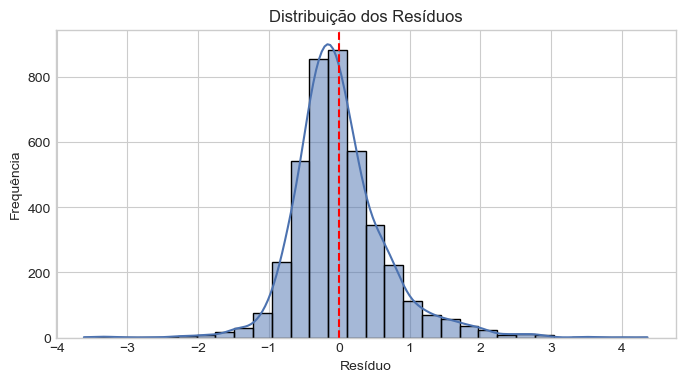

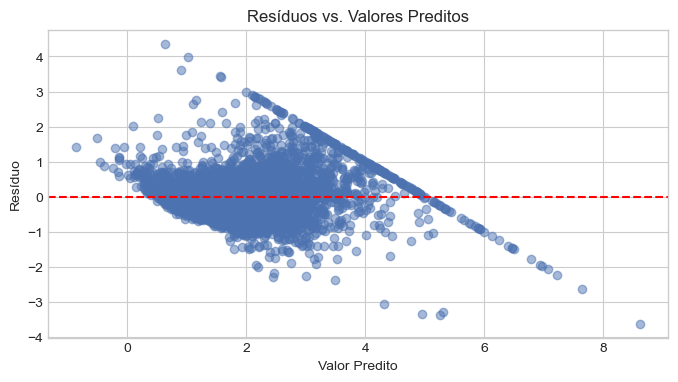

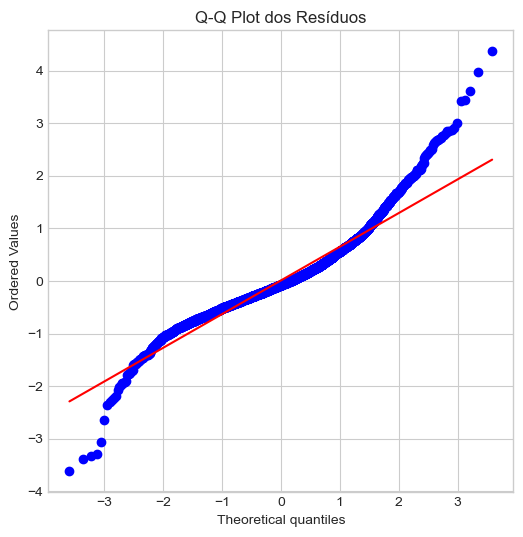

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# C√°lculo dos res√≠duos
residuos = y_test_step - y_pred_step  # ou y_test_final - y_pred_final

# 1. Histograma dos res√≠duos (esperado: centrado em zero)
plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribui√ß√£o dos Res√≠duos')
plt.xlabel('Res√≠duo')
plt.ylabel('Frequ√™ncia')
plt.show()

# 2. Res√≠duos vs. valores previstos (esperado: dispers√£o aleat√≥ria)
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_step, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Res√≠duos vs. Valores Preditos')
plt.xlabel('Valor Predito')
plt.ylabel('Res√≠duo')
plt.show()

# 3. Q-Q Plot (esperado: pontos pr√≥ximos da linha)
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Res√≠duos')
plt.show()


##  An√°lise de Res√≠duos

Ap√≥s o treinamento do modelo de regress√£o, foi realizada a an√°lise dos res√≠duos para verificar se as suposi√ß√µes da regress√£o linear foram atendidas.

###  Distribui√ß√£o dos Res√≠duos  
O histograma mostra que os res√≠duos est√£o aproximadamente distribu√≠dos de forma sim√©trica e centrada em zero. Isso indica que o erro m√©dio do modelo √© nulo e que os res√≠duos t√™m caracter√≠sticas pr√≥ximas de uma distribui√ß√£o normal.

###  Res√≠duos vs. Valores Preditos  
O gr√°fico revela uma leve tend√™ncia nos res√≠duos, especialmente em valores extremos. Isso pode indicar que o modelo apresenta alguma **heterocedasticidade** (vari√¢ncia dos erros n√£o constante), o que √© comum em dados reais. Ainda assim, o padr√£o √© relativamente disperso e n√£o muito grave.

###  Q-Q Plot (Quantile-Quantile Plot)  
O gr√°fico Q-Q indica que os res√≠duos seguem aproximadamente uma distribui√ß√£o normal, mas com algumas discrep√¢ncias nas caudas (valores muito altos ou muito baixos). Apesar disso, o comportamento geral dos res√≠duos √© aceit√°vel para o uso de regress√£o linear.

---

###  Conclus√£o  
Com base nesses tr√™s diagn√≥sticos, podemos afirmar que as suposi√ß√µes fundamentais da regress√£o linear s√£o **parcialmente atendidas**. O modelo √© v√°lido, mas pode ser melhorado com t√©cnicas mais robustas caso se deseje ainda mais precis√£o estat√≠stica (como transforma√ß√£o de vari√°veis ou modelos n√£o-lineares).


## Conclus√£o Final

O objetivo do projeto foi prever o **valor mediano das casas na Calif√≥rnia** com base em vari√°veis socioecon√¥micas, demogr√°ficas e estruturais. Utilizando regress√£o linear, foi poss√≠vel quantificar a influ√™ncia de cada vari√°vel no pre√ßo dos im√≥veis.

---

###  1. Renda m√©dia da popula√ß√£o (MedInc)

No modelo simples que usou apenas a vari√°vel `MedInc`, o R¬≤ foi de aproximadamente **0.4589**, ou seja, a renda m√©dia da regi√£o sozinha j√° explica cerca de 46% da varia√ß√£o nos pre√ßos. Isso reflete um princ√≠pio econ√¥mico b√°sico: **quanto maior a renda das fam√≠lias, maior a capacidade de compra e maior tende a ser o valor dos im√≥veis na regi√£o**.

---

###  2. Caracter√≠sticas f√≠sicas do im√≥vel

Modelos m√∫ltiplos que inclu√≠ram vari√°veis como:
- `AveRooms` (m√©dia de c√¥modos)
- `HouseAge` (idade m√©dia das constru√ß√µes)
- `AveOccup` (ocupa√ß√£o m√©dia por resid√™ncia)

apresentaram desempenho superior. Isso mostra que **tamanho, idade e densidade da habita√ß√£o impactam diretamente o pre√ßo**, como √© comum no mercado imobili√°rio.

---

###  3. Localiza√ß√£o geogr√°fica (Latitude e Longitude)

As vari√°veis de localiza√ß√£o foram mantidas nos melhores modelos, como o **modelo Stepwise**, indicando que a **geografia tamb√©m √© determinante no valor das casas**. Regi√µes como litoral, √°reas urbanas e centros tecnol√≥gicos tendem a ter pre√ßos mais altos, o que se alinha com a realidade da Calif√≥rnia (ex: Vale do Sil√≠cio, Los Angeles, San Diego).

---

###  4. Modelo Stepwise: o mais eficiente

O modelo com sele√ß√£o autom√°tica de vari√°veis (`mlxtend` ‚Äì Stepwise Regression) obteve:
- **R¬≤: 0.6655**
- **RMSE: 0.6621**
- **MAPE: 28.69%**

Com isso, foi poss√≠vel identificar um subconjunto de vari√°veis que representa **quase 67% da explica√ß√£o da varia√ß√£o no pre√ßo das casas**, com um bom equil√≠brio entre complexidade e desempenho.

---

###  Conclus√£o

Os resultados mostram que √© poss√≠vel prever com boa precis√£o o valor das casas com base em vari√°veis como:
- **Renda da popula√ß√£o**
- **Tamanho e estrutura das casas**
- **Densidade populacional**
- **Localiza√ß√£o geogr√°fica**

Esses fatores est√£o diretamente ligados √†s leis da **oferta e demanda do mercado imobili√°rio**, tornando a previs√£o n√£o apenas estatisticamente s√≥lida, mas tamb√©m **economicamente justific√°vel**.